# Cluster the data and visualize
Following [this guide](https://www.askpython.com/python/examples/plot-k-means-clusters-python)

In [1]:
!pip install scikit-learn matplotlib mplcursors ipympl python-dotenv openai langchain
!pip install ipywidgets --upgrade

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
#Importing required modules
from typing import List, Tuple
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import json
import cluster

file_path = f"data_store/embeddings_seed_69420_size_10000.json"
embeddings: List[Tuple[str, List[float]]] = json.load(open(file_path, "r"))

N_EMBED_DIMS = len(embeddings[0][1])
N_CLUSTERS = 18
N_DIMS = N_EMBED_DIMS
SEED = 69420
df, label, u_labels = cluster.cluster(embeddings, n_clusters=N_CLUSTERS)

/home/lev/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
np.random.seed(SEED)
choices = np.random.choice(np.arange(len(df)), size=800)
colors = np.random.rand(N_CLUSTERS, 3)

In [4]:
%matplotlib ipympl
import textwrap
from mplcursors import cursor
import mplcursors
from matplotlib.text import Annotation

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)
c = np.random.randint(1,5,size=len(choices))

def plot_axis(dim : int):
    dim_1 = dim
    fig, ax = plt.subplots(figsize=(18,10))
    curr_ax = ax
    sc = curr_ax.scatter(df[choices, dim_1], np.zeros(len(choices)), color=colors[label[choices]])
    curr_ax.set_title(f"KMeans on Dimension {dim_1 + 1}")


    annot = curr_ax.annotate("", xy=(-0,0), xytext=(-80, 15), textcoords="offset points",
                    bbox=dict(boxstyle="round,pad=0.3", fc="w"),
                    arrowprops=dict(arrowstyle="->")
                    )
    annot.set_wrap(True)
    annot.set_visible(False)

    def update_annot(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}".format(" ".join([embeddings[n][0] for n in ind["ind"]]))
        wrapped_text = textwrap.fill(text, width=60)

        annot.set_text(wrapped_text)
        # annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(1)


    def hover(event):
        # print("AAAA", event)
        vis = annot.get_visible()
        if event.inaxes is not None and event.inaxes == ax:
            # print("BBBB", event)
            # print(scs[0])
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()
    fig.canvas.mpl_connect("motion_notify_event", hover)

In [5]:
# print("\n".join(get_theorems_in_group(0)[:20]))
# print("\n\n")

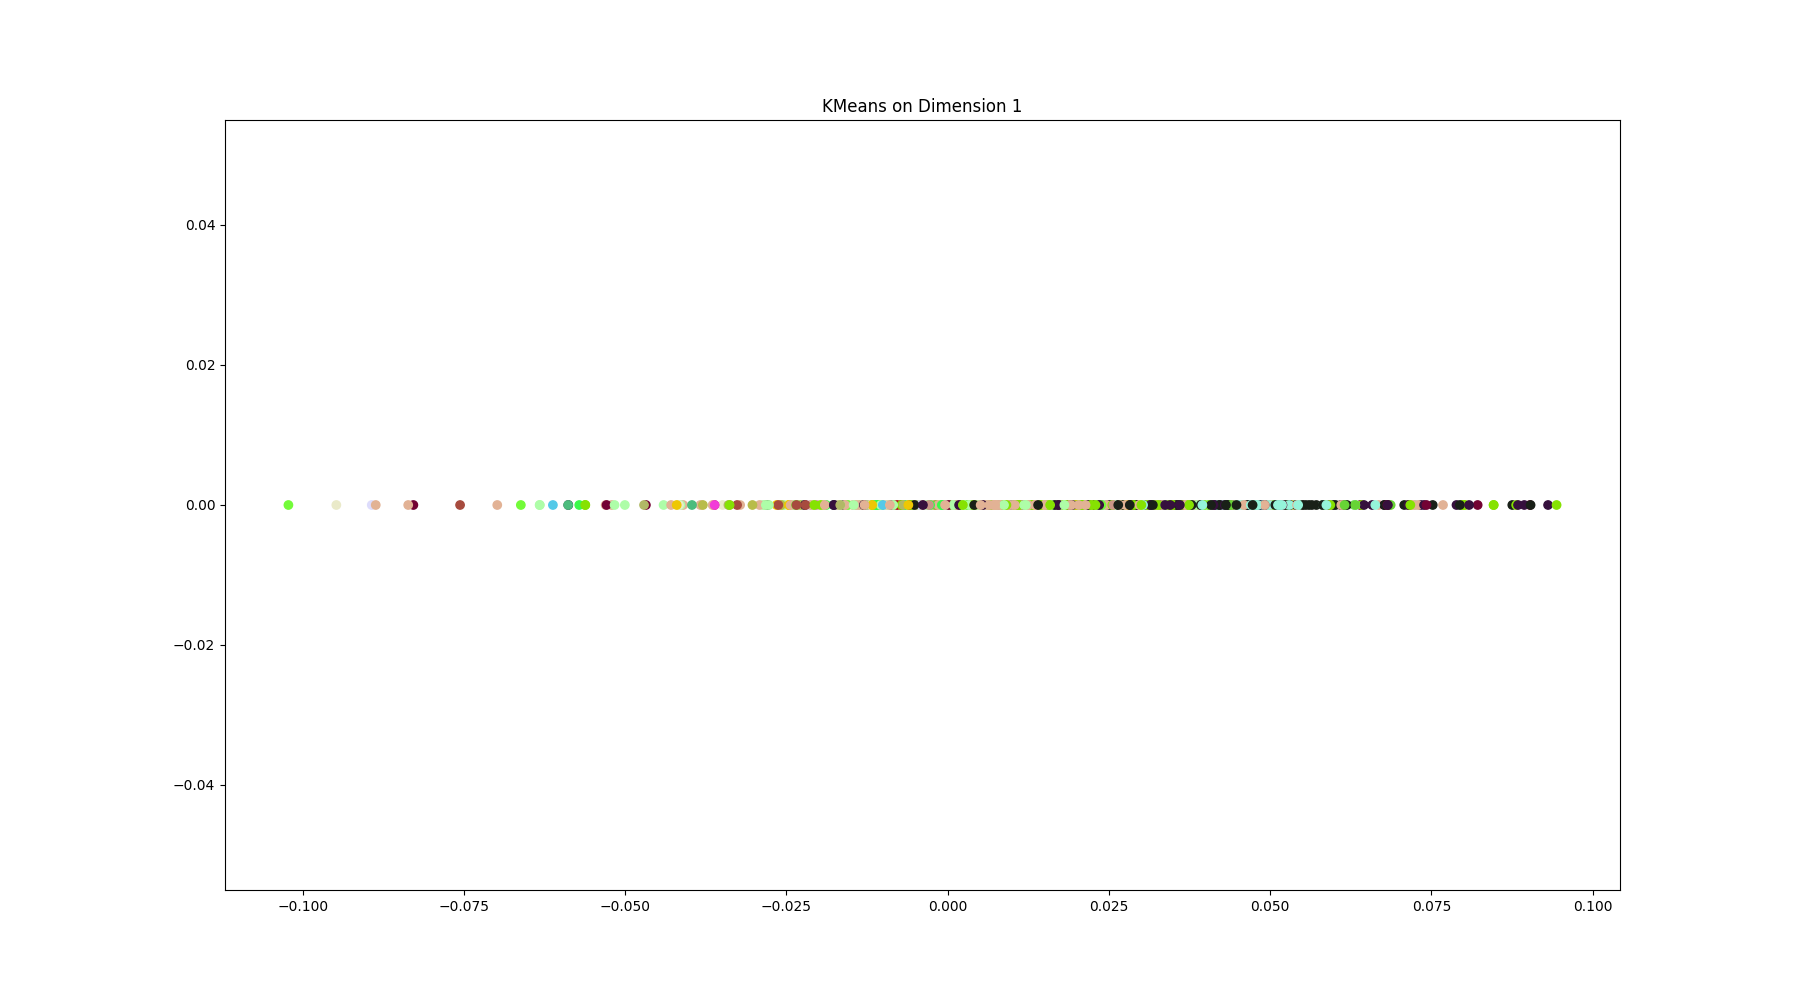

In [6]:
plot_axis(0)

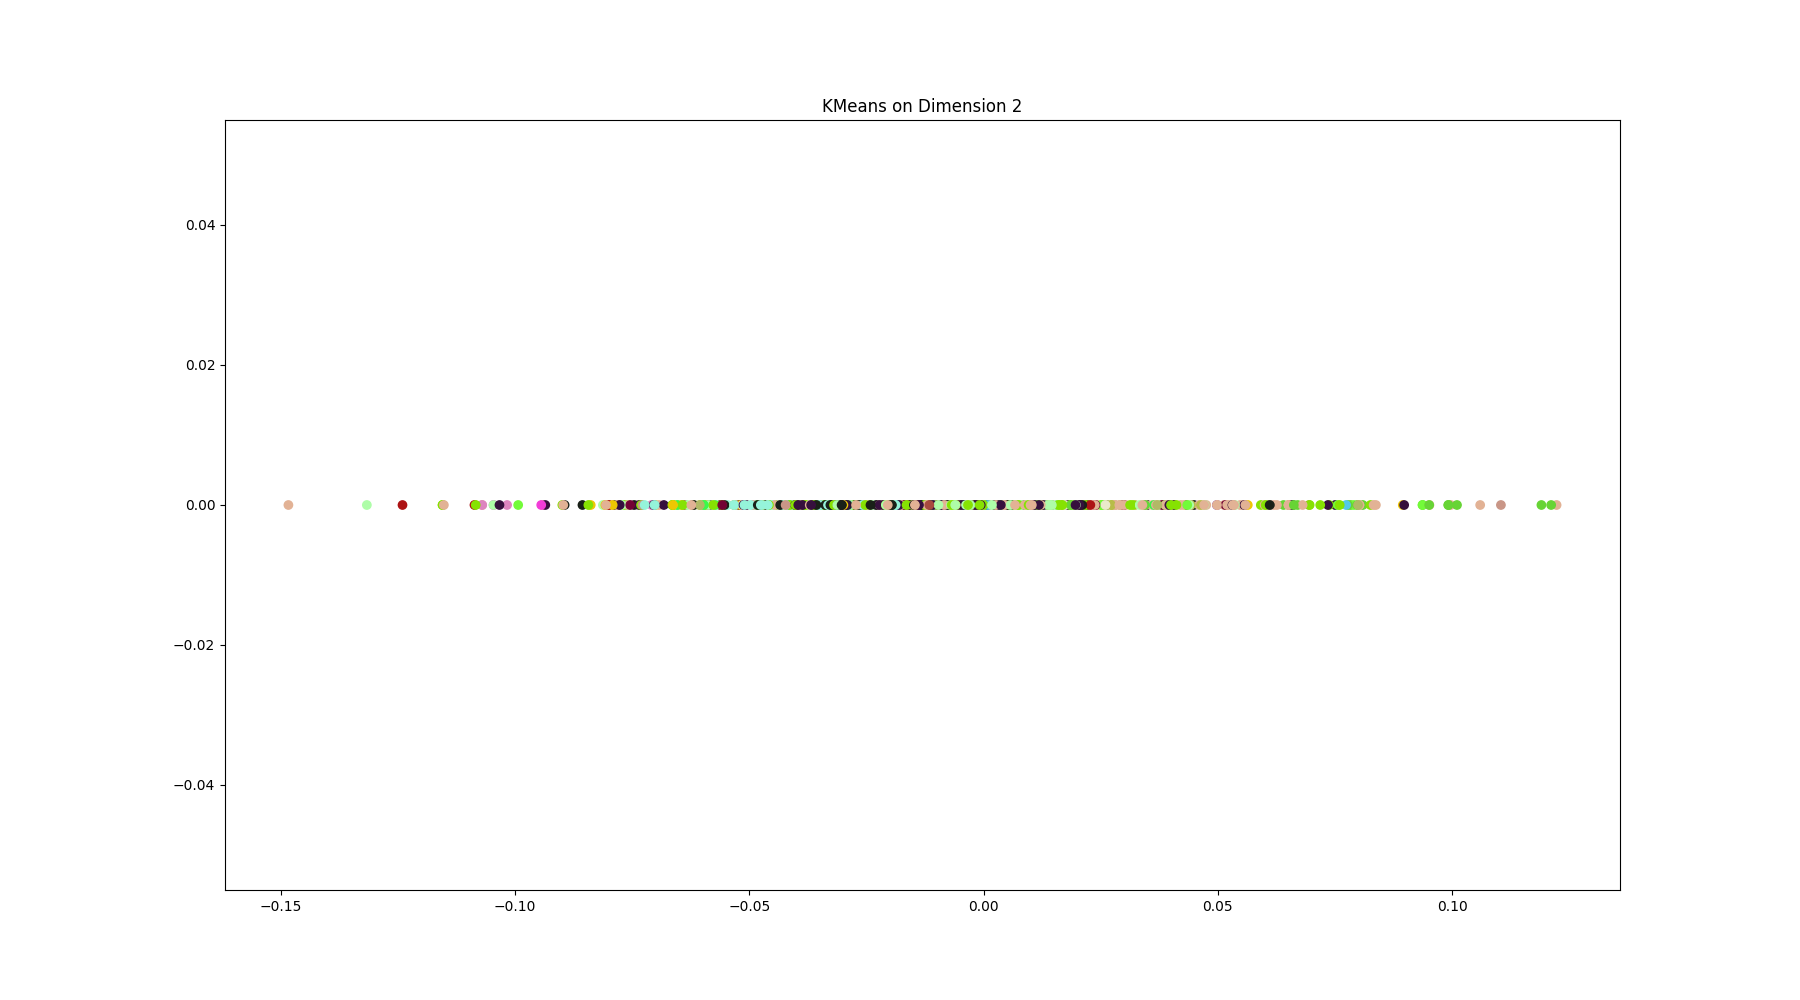

In [7]:
plot_axis(1)

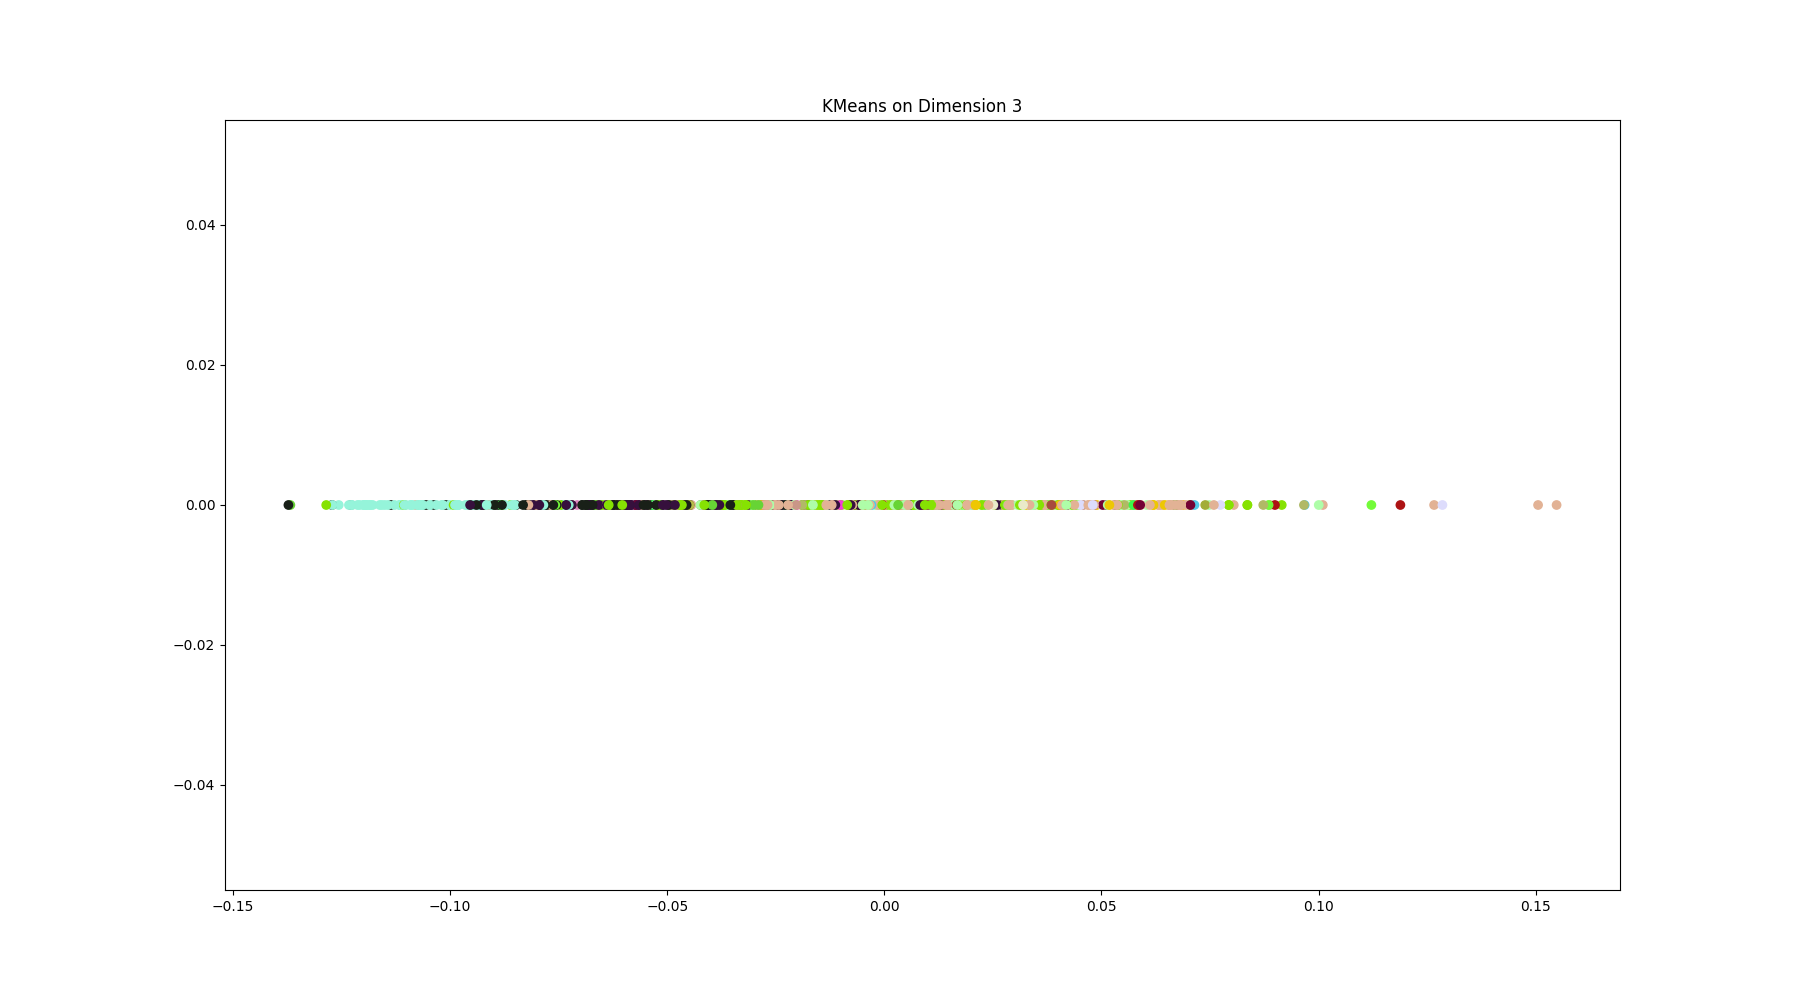

In [8]:
plot_axis(2)

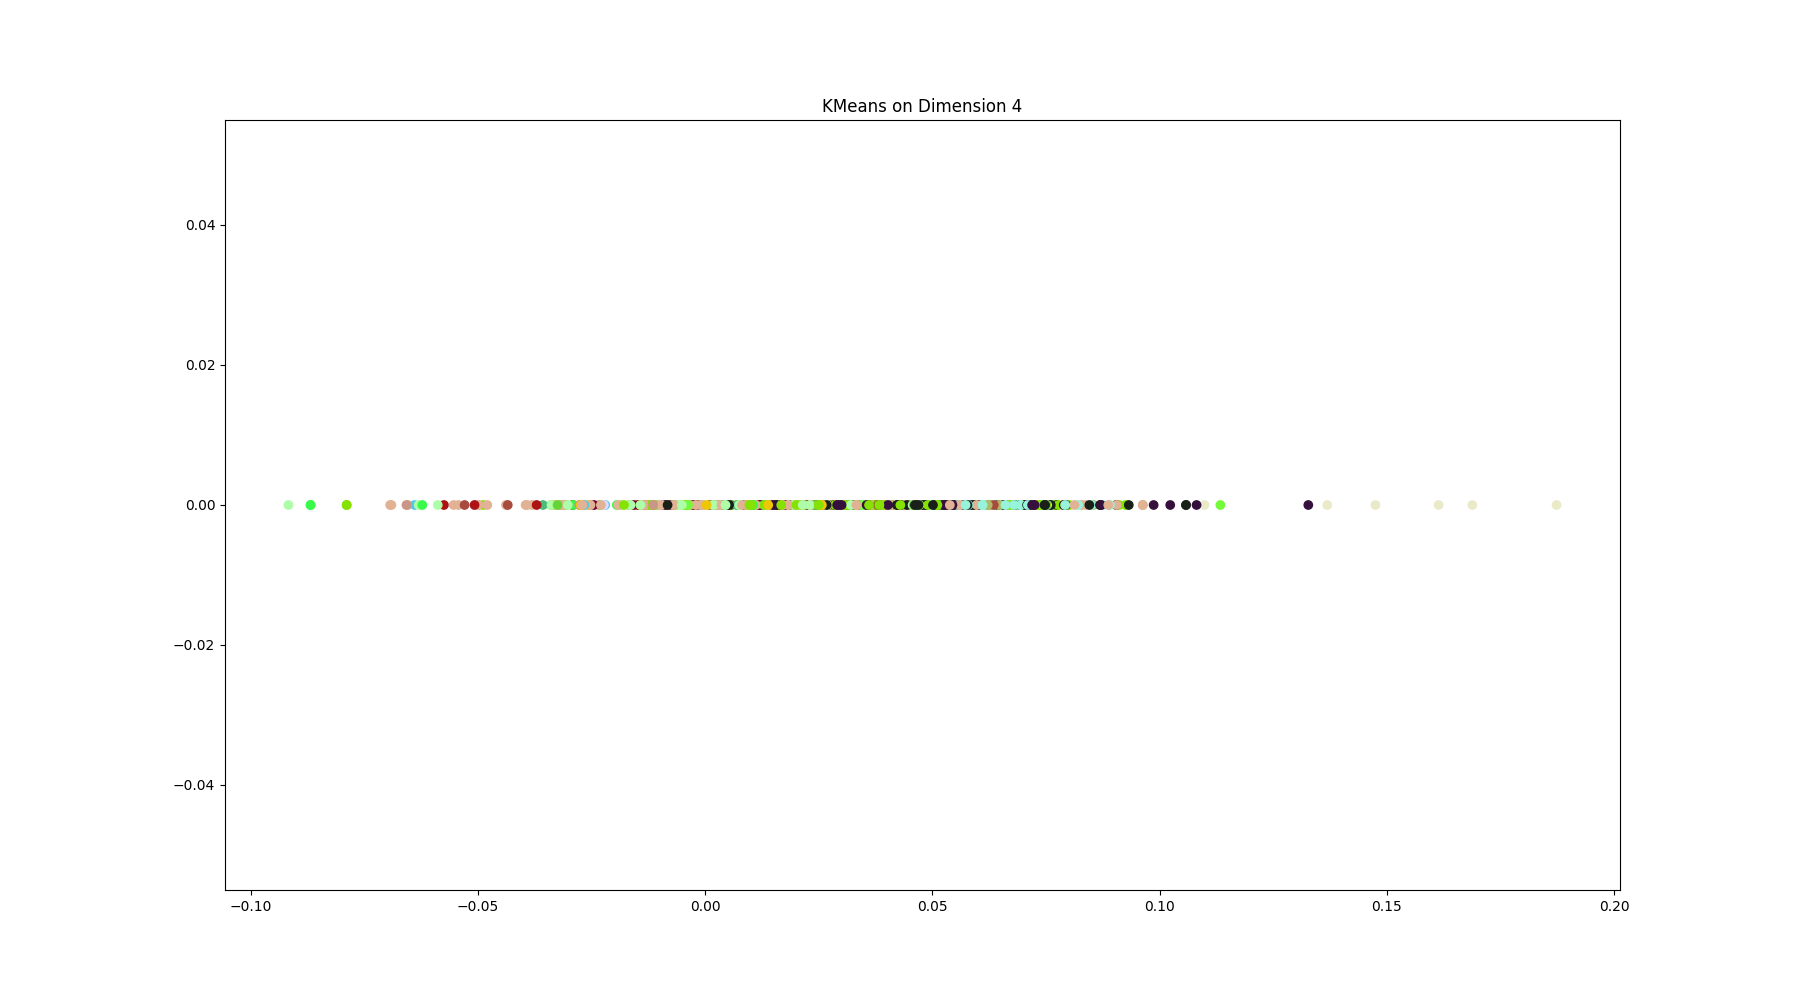

In [9]:
plot_axis(3)

In [10]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [11]:
import cluster

def get_theorems_in_group(group_idx: int, max_size=None, random=True):
	s = [embeddings[i][0] for i in np.where(label == group_idx)[0]]
	if max_size is None or len(s) <= max_size: 
		return s
	if not random:
		return s[:max_size]
	c = np.random.choice(np.arange(len(s)), size=max_size, replace=False)
	return [s[i] for i in c]

MAX_SIZE=20
get_theorems_in_group(6, max_size=MAX_SIZE)#, get_theorems_in_group(6, max_size=MAX_SIZE), i, j, api_key=OPENAI_API_KEY
# rel_0_1  = cluster.relative_labels(get_theorems_in_group(0, max_size=MAX_SIZE), get_theorems_in_group(1, max_size=MAX_SIZE), api_key=OPENAI_API_KEY)

['theorem bUnion_empty (s : α → set β) : (⋃ x ∈ (∅ : set α), s x) = ∅',
 'lemma empty_eq : (∅ : list α) = []',
 'theorem empty_union {s : alist β} : (∅ : alist β) ∪ s = s',
 'lemma piecewise_empty [Π i : α, decidable (i ∈ (∅ : finset α))] : piecewise ∅ f g = g',
 'lemma lcm_empty : (∅ : finset β).lcm f = 1',
 'lemma off_diag_empty : (∅ : set α).off_diag = ∅',
 'lemma closure_empty : closure (∅ : set M) = ⊥',
 'theorem infi_emptyset {f : β → α} : (⨅ x ∈ (∅ : set β), f x) = ⊤',
 'lemma range_eq_empty_iff {f : ι → α} : range f = ∅ ↔ is_empty ι',
 'lemma eq_empty_iff_forall_not_mem {s : finset α} : s = ∅ ↔ ∀ x, x ∉ s',
 'theorem not_mem_empty (a : α) : a ∉ (∅ : alist β)',
 'lemma is_lub_empty [order_bot α] : is_lub ∅ (⊥:α)',
 'theorem mem_empty_iff_false (x : α) : x ∈ (∅ : set α) ↔ false',
 'lemma pairwise_disjoint_empty : (∅ : set ι).pairwise_disjoint f',
 'lemma not_nonempty_iff_eq_empty {s : set α} : ¬s.nonempty ↔ s = ∅',
 'theorem not_empty_hom (x : Set.{u}) : ¬ (∅ : Class.{u}) x',
 't

In [12]:
def get_all_differences():
	differences = []
	for i in range(N_CLUSTERS):
		for j in range(i):
			print(i, j)
			diffs = cluster.relative_labels(get_theorems_in_group(i, max_size=MAX_SIZE), get_theorems_in_group(j, max_size=MAX_SIZE), i, j, api_key=OPENAI_API_KEY)
			print(diffs)
			differences.append((i, j, diffs))
	return differences
j = {}
# j['differences'] = get_all_differences()
# j['differences'] = differences

In [13]:
# TODO: change to ture?
if False:
	j['theorems'] = [[
					[lab, embeddings[idx][0]] for idx in np.where(label == lab)[0].tolist()
			  ] for lab in range(N_CLUSTERS)]
	# get_all_differences()
	json.dump(j, open(f"data_store/differences_clustersize_{N_CLUSTERS}_seed_{SEED}.json", "w"))

## Assign a final label based off of differences

In [14]:
from langchain import OpenAI

def get_label(centroid_idx: int, differences: List[Tuple[int, int, str]]):
	related_diffs = []
	for i, j, diffs in differences:
		if i == centroid_idx or j == centroid_idx:
			related_diffs.append(diffs)
	label = "Set Cluster " + str(centroid_idx)
	prompt = "Given the following differences between different sets of two cluster, what is the primary focus of " + label + """ in one sentence?

""" + "\n".join(related_diffs) + """

PRIMARY FOCUS:"""
	llm = OpenAI(model_name="gpt-4", openai_api_key=OPENAI_API_KEY)
	ret = llm(prompt)
	return ret


In [15]:
def get_and_save_all_labels():
	llm_labels = []
	for i in range(N_CLUSTERS):
		llm_labels.append(get_label(i, j['differences']))
	j["llm_labels"] = llm_labels
	json.dump(j, open(f"data_store/differences_clustersize_{N_CLUSTERS}_seed_{SEED}.json", "w"))
# get_and_save_all_labels()

## Now lets try a "BP" based approach

In [16]:
import numbers

# From https://github.com/hichamjanati/pyldpc, but modified to make a square matrix
def check_random_state(seed):
    """Turn seed into a np.random.RandomState instance
    Parameters
    ----------
    seed : None | int | instance of RandomState
        If seed is None, return the RandomState singleton used by np.random.
        If seed is an int, return a new RandomState instance seeded with seed.
        If seed is already a RandomState instance, return it.
        Otherwise raise ValueError.
    """
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, numbers.Integral):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError('%r cannot be used to seed a numpy.random.RandomState'
                     ' instance' % seed)

def parity_check_matrix(n_code, d_v, d_c, seed=None):
    """
    Build a regular Parity-Check Matrix H following Callager's algorithm.

    Parameters
    ----------
    n_code: int, Length of the codewords.
    d_v: int, Number of parity-check equations including a certain bit.
        Must be greater or equal to 2.
    d_c: int, Number of bits in the same parity-check equation. d_c Must be
        greater or equal to d_v and must divide n.
    seed: int, seed of the random generator.

    Returns
    -------
    H: array (n_equations, n_code). LDPC regular matrix H.
        Where n_equations = d_v * n / d_c, the total number of parity-check
        equations.

    """
    rng = check_random_state(seed)

    if d_v <= 1:
        raise ValueError("""d_v must be at least 2.""")

    # if d_c <= d_v:
    #     raise ValueError("""d_c must be greater than d_v.""")

    if n_code % d_c:
        raise ValueError("""d_c must divide n for a regular LDPC matrix H.""")

    n_equations = (n_code * d_v) // d_c

    block = np.zeros((n_equations // d_v, n_code), dtype=int)
    H = np.empty((n_equations, n_code))
    block_size = n_equations // d_v

    # Filling the first block with consecutive ones in each row of the block

    for i in range(block_size):
        for j in range(i * d_c, (i+1) * d_c):
            block[i, j] = 1
    H[:block_size] = block

    # reate remaining blocks by permutations of the first block's columns:
    for i in range(1, d_v):
        H[i * block_size: (i + 1) * block_size] = rng.permutation(block.T).T
    H = H.astype(int)
    return H

parity_check_matrix(16, 4, 4)

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [17]:
import numpy as np

cluster_cluster_deg = 3
# Half of the clusters are "parity checks" and the rest are "bits"
H= parity_check_matrix(int(N_CLUSTERS / 2), cluster_cluster_deg, cluster_cluster_deg, seed=SEED)
H

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]])

In [18]:
# Get the bit indices and the parity check indices
parity_check_inds = np.random.choice(np.arange(N_CLUSTERS), size=int(N_CLUSTERS / 2), replace=False)
bit_inds = np.array(list(filter(lambda x: x not in parity_check_inds, np.arange(N_CLUSTERS))))
np.random.shuffle(bit_inds)
bit_inds, parity_check_inds

(array([10,  6, 15, 14,  2,  0,  7,  5,  3, 12, 11, 16]),
 array([ 4, 19, 20,  9,  8, 23, 22, 18,  1, 13, 21, 17]))

In [19]:
import cluster
import asyncio
import copy
import numpy.typing as npt
from typing import List
# Jank BP-esque LLM message passing algorithm
MODEL_NAME = "gpt-3.5-turbo-16k" # Use GPT-4 later
# MODEL_NAME = "gpt-4"

llm = OpenAI(model_name=MODEL_NAME, openai_api_key=OPENAI_API_KEY)

def get_data_file_name():
	return f"data_store/llm_bp_clustersize_{N_CLUSTERS}_seed_{SEED}_{MODEL_NAME}.json"

def save_dict(d: dict):
	json.dump(d, open(get_data_file_name(), "w"))

# TODO: there does not seem to be much distinction between the parity checks and the bits
async def llm_bp(H_cluster: npt.NDArray, bit_inds: npt.ArrayLike, check_inds: npt.ArrayLike, n_rounds: int, dict_out = {}):

	# For simplicity, we will use an adjacency matrix for now. Later we can flatten this data-structure to make it cheaper
	if "rounds" in dict_out and len(dict_out["rounds"]) > 0:
		primary_focuses_msgs_last = dict_out["rounds"][-1]
	else:
		primary_focuses_msgs_last = [["" for _ in range(N_CLUSTERS)] for _ in range(N_CLUSTERS)]
	# primary_focuses_msgs = [["" for _ in range(N_CLUSTERS)] for _ in range(N_CLUSTERS)]

	async def pc_to_bit(i):
		H_ind = np.where(check_inds == i)[0][0]
		neighbors = np.where(H_cluster[H_ind, :] == 1)
		cluster_neighbor_inds = bit_inds[neighbors]
		p = ["" for _ in range(N_CLUSTERS)]

		for neighbor_ind in range(cluster_cluster_deg):
			neighbors_without_neighbor = np.delete(cluster_neighbor_inds, neighbor_ind)
			
			ret = await cluster.local_neighbor_with_descr_labels(get_theorems_in_group(i, max_size=MAX_SIZE), primary_focuses_msgs_last[i],
																[get_theorems_in_group(j, max_size=MAX_SIZE)
																for j in neighbors_without_neighbor], [primary_focuses_msgs_last[j][i] for j in neighbors_without_neighbor], llm=llm)
			
			# primary_focuses_msgs[i][cluster_neighbor_inds[neighbor_ind]] = ret
			p[cluster_neighbor_inds[neighbor_ind]] = ret
		return (i, p)
	
	async def bit_to_pc(i):
		H_ind = np.where(bit_inds == i)[0][0]
		# TODO: OH GOODNESS!!! THIS IS A BUG
		# neighbors = np.where(H_cluster[H_ind, :] == 1)
		neighbors = np.where(H_cluster[:, H_ind] == 1)
		cluster_neighbor_inds = check_inds[neighbors]
		p = ["" for _ in range(N_CLUSTERS)]

		for neighbor_ind in range(cluster_cluster_deg):
			neighbors_without_neighbor = np.delete(cluster_neighbor_inds, neighbor_ind)
			
			ret = await cluster.local_neighbor_with_descr_labels(get_theorems_in_group(i, max_size=MAX_SIZE), primary_focuses_msgs_last[i],
																[get_theorems_in_group(j, max_size=MAX_SIZE)
																for j in neighbors_without_neighbor], [primary_focuses_msgs_last[j][i] for j in neighbors_without_neighbor], llm=llm)
			# primary_focuses_msgs[i][cluster_neighbor_inds[neighbor_ind]] = ret
			p[cluster_neighbor_inds[neighbor_ind]] = ret
		print("DONE WITH", i)
		return (i, p)

	# dict_out["rounds"].append(copy.deepcopy(primary_focuses))
	# save_dict(dict_out)
	if "rounds" not in dict_out:
		dict_out["rounds"] = []
	for round_numb in range(n_rounds): # < n_rounds * 2
		print(f"BP Round {round_numb + 1} out of {n_rounds}")
		dict_out["rounds"].append([])
		SKIP = 8
		tmp = []
		for i in range(0, N_CLUSTERS, SKIP):
			tasks = []
			for skip in range(min(SKIP, N_CLUSTERS - i)):
				if i + skip in bit_inds:
					tasks.append(bit_to_pc(i + skip))
					# primary_focuses_msgs[i] = p
				else:
					tasks.append(pc_to_bit(i + skip))
				print("Appended cluster", i + skip)
			tmp = tmp + (await asyncio.gather(*tasks))
			

		# tmp = await asyncio.gather(*tasks)
		tmp.sort(key=lambda x: x[0])
		# sorted = np.array(tmp)[np.argsort(np.array([a[0] for a in tmp]))]
		primary_focuses_msgs =  [a[1] for a in tmp]
		print(primary_focuses_msgs)
		dict_out["rounds"][-1] = primary_focuses_msgs
		save_dict(dict_out)
		primary_focuses_msgs_last = copy.deepcopy(primary_focuses_msgs)
		save_dict(dict_out)
	return dict_out

/home/lev/.local/lib/python3.9/site-packages/langchain/llms/openai.py:200: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/home/lev/.local/lib/python3.9/site-packages/langchain/llms/openai.py:787: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [20]:
d_out = json.load(open(get_data_file_name(), "r")) if os.path.exists(get_data_file_name()) else {}
print(d_out)
ROUNDS = 2
await llm_bp(H, bit_inds, parity_check_inds, ROUNDS, d_out)

{}
BP Round 1 out of 2
Appended cluster 0
Appended cluster 1
Appended cluster 2
Appended cluster 3
DONE WITH 0
DONE WITH 2
DONE WITH 3
Appended cluster 4
Appended cluster 5
Appended cluster 6
Appended cluster 7
DONE WITH 7
DONE WITH 6
DONE WITH 5
Appended cluster 8
Appended cluster 9
Appended cluster 10
Appended cluster 11
DONE WITH 10
DONE WITH 11
Appended cluster 12
Appended cluster 13
Appended cluster 14
Appended cluster 15
DONE WITH 15
DONE WITH 14
DONE WITH 12
Appended cluster 16
Appended cluster 17
Appended cluster 18
Appended cluster 19
DONE WITH 16
Appended cluster 20
Appended cluster 21
Appended cluster 22
Appended cluster 23
[['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'The primary theorems focus on a wide range of topics and concepts, such as category theory, applicative functors, sets, algebraic structures, and list manipulation. They involve various mathematical operations and properties, including intersection, union, difference, subset, image, in

{'rounds': [[['',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    'The primary theorems focus on a wide range of topics and concepts, such as category theory, applicative functors, sets, algebraic structures, and list manipulation. They involve various mathematical operations and properties, including intersection, union, difference, subset, image, inverse, divisibility, equality, and maps. These theorems are key results that are fundamental to understanding and proving related mathematical concepts and theorems.\n\nOn the other hand, the non-primary theorems consist of additional results that are not the main focus or central to the subject at hand. They cover a broader range of topics, including set theory, list manipulation, algebraic structures, number theory, and properties of functions. These theorems may be useful or related to the primary theorems in some way, but they are not the main topics of

In [21]:
def save_thms():
	d_out['thm_clusters'] = [
		np.where(label == group_idx)[0].tolist() for group_idx in range(N_CLUSTERS)
	]
	save_dict(d_out)
save_thms()

In [22]:
def shorten(node_idx: int, ind: int):
	# ind = 0
	# print(d_out["rounds"])
	last_msgs = filter(lambda a: a != "", d_out["rounds"][ind][node_idx])
	joined = "\n".join(last_msgs)
	prompt = f"""Given the following descriptions of a primary set and the differences between a primary set of theorems and an adjacent set of theorems, what is the primary focus of the primary set of theorems in one or two sentence?

DIFFERENCES: "{joined}"

SHORTENED PRIMARY FOCUS:"""
	return llm(prompt)

def shorten_all(bp_round=-1):
	if "shortened" not in d_out:
		d_out["shortened"] = []
	ind = -1
	d_out["shortened"].append([])
	d_out["shortened"][-1] = ["BP Round " + str((len(d_out["rounds"]) + ind) % len(d_out["rounds"])), []]
	for i in range(N_CLUSTERS):
		d_out["shortened"][-1][1].append(shorten(i, bp_round))
		save_dict(d_out)

if False:
	shorten_all(1)
# We can check out **how much** having consecutive rounds matters via shortening different message rounds

## Check manually if the cluster labels match the set

In [24]:
d_out = json.load(open(get_data_file_name(), "r")) if os.path.exists(get_data_file_name()) else {}
if "shortened" not in d_out:
	d_out["shortened"] = []
# def check_subset(cluster_ind: int):
# 	thms = get_theorems_in_group(cluster_ind, max_size=5)
# 	print("Theorems:\n", thms[0])
# 	cluster_descr = d_out["shortened"][-2][1][cluster_ind]
# 	print("Cluster Description:\n", cluster_descr)
# check_subset(20)

Theorems:
 lemma cmp_using_eq_lt (a b : α) : (cmp_using lt a b = ordering.lt) = lt a b


IndexError: list index out of range